## ***Best Practices :: `Feature Selection`***

---
#### **The objective for creating this notebook is to understand below topics:**
- **`Different types of Feature Selection Techniques`** 
- **`Which technique to be applied on which kind of dataset`**
- **`How these techniques work and different from each other?`**
- **`Examples`**
---

1. [Understanding Feature Selection](#Background)
2. [Regression problem](#Regression_Problem)
    1. [Case-1 : Selecting only top 4 features : **`SelectKBest`** **`f_regression`**](#Case-1)
        1. [Case-1.2 : Selecting only top 4 features with **`SelectPercentile`**](#Case-1.2)
    2. [Case-2 : Selecting top 8 features instead of 4](#Case-2)
3. [Classification Problem](#Classification_Problem)
    1. [Case-1 : Selecting top 5 features : **`f_classif`**](#Case:1)
    2. [Case-2 : Only Categorical Explanatory Variables :: Selecting only top 5 features](#Case:2)
        1. [Difference between Sklearn Label and Ordinal Encoder](#Diff_b/w_LE_and_OE)
        2. [**`Mutual_info_classif`**](#Mutual_info_classif)
    3. [Case-3 : Categorical Explanatory & Target Variables](#Case:3)
        1. [Case-3.1 : With **`Chi-Squared`** Scoring Function](#Case:3.1)
        2. [Case-3.2 : With Mutual Information Scoring Function](#Case:3.2)
4. [Feature Forward Selection](#Feature_Forward_Selection)
5. [Backward Elimination](#Backward_Elimination)
6. [Bi-Directional Elimination](#Bi-Directional_Elimination)
7. [Lasso Regularization using **`SelectFromModel`**](#Lasso_Regularization)
8. [Ridge Regularization using **`SelectFromModel`**](#Ridge_Regularization)
9. [Permutation Importance](#Permutation_Importance)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### **Background**

**`Feature Selection`**
- It is the process of selecting the most relevant subset of input features from the dataset. Below are some feature selection techniques.

1. **`Unsupervised`** : This type of feature selection techniques doesn't use the target variable
    - For example, such methods uses the correlation in the input features and remove the redundant variables
    - **`Low Variance Threshold and KNN based Laplacian Score`**
        
2. **`Supervised`** : This type of feature selection techniques uses the target variable
    - For example, input features which are not explaining the variations in target variable are considereed as irrelevant variables thus got removed
    
    
2.1. **`Wrapper`** : Search for well-performing subsets of features on a machine learning model.
- **`Forward Feature Selection(FFS), Backword Elimination(BE), Bi-Directional Elimination(RFE)`**


2.2. **`Filter`** : Select subsets of features based on their relationship with the target.
- **`Statistical Methods like ANOVA, CHI, Kendall's, PCC and SPC`**


2.3 **`Embedded`** :
- Information Therory: Algorithms that perform automatic feature selection during training.
    - **`Decision Trees and its extensions`**

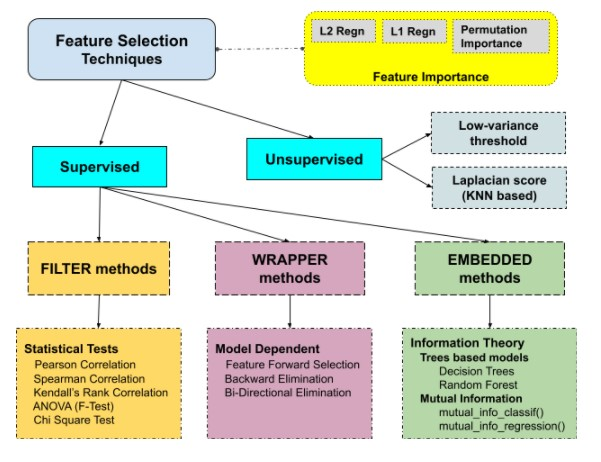

In [2]:
from IPython.display import Image

path = 'E:\STUDY\PROJECTS\AAIC_Practice\MODULES\Module_3\Mod_3_Feature_Encoding\Feature_Selection_Pics\\'
Image(filename = path + "1_1_Feat_Sel_Tech.jpg", width=750, height=750)

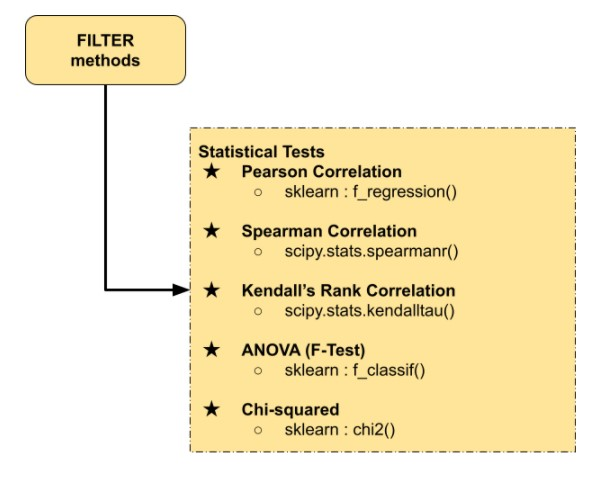

In [3]:
from IPython.display import Image

path = 'E:\STUDY\PROJECTS\AAIC_Practice\MODULES\Module_3\Mod_3_Feature_Encoding\Feature_Selection_Pics\\'
Image(filename = path + "1_2_Filter_Methods.jpg", width=600, height=600)

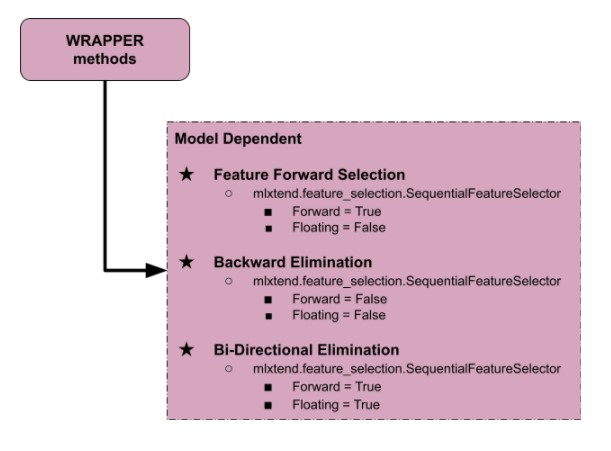

In [4]:
from IPython.display import Image

path = 'E:\STUDY\PROJECTS\AAIC_Practice\MODULES\Module_3\Mod_3_Feature_Encoding\Feature_Selection_Pics\\'
Image(filename = path + "1_3_Wrapper_Methods.jpg", width=650, height=650)

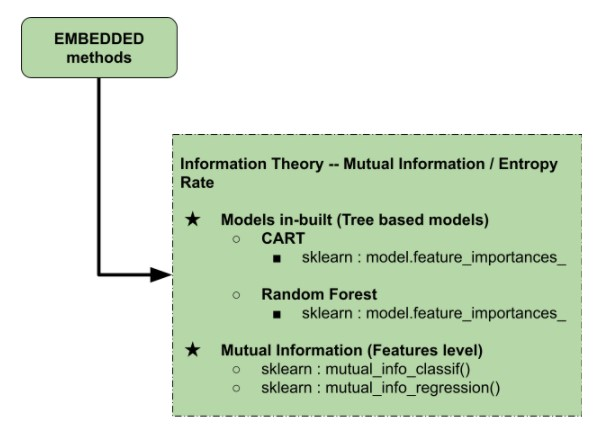

In [5]:
from IPython.display import Image

path = 'E:\STUDY\PROJECTS\AAIC_Practice\MODULES\Module_3\Mod_3_Feature_Encoding\Feature_Selection_Pics\\'
Image(filename = path + "1_4_Embedded_Methods.jpg", width=650, height=650)

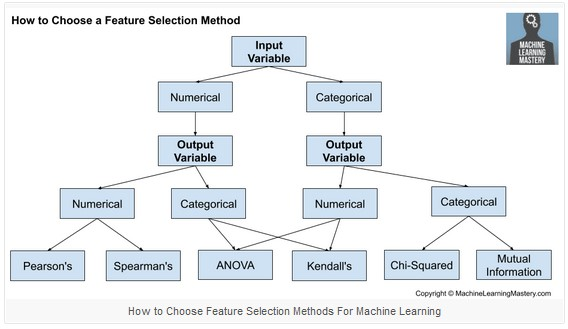

In [6]:
from IPython.display import Image

# Thanks to Machine Learning Mastery (Jason Brownlee)
path = 'E:\STUDY\PROJECTS\AAIC_Practice\MODULES\Module_3\Mod_3_Feature_Encoding\Feature_Selection_Pics\\'
Image(filename = path + "1_5_How_to_choose_Feature_Selection_Tech.jpg", width=750, height=750)

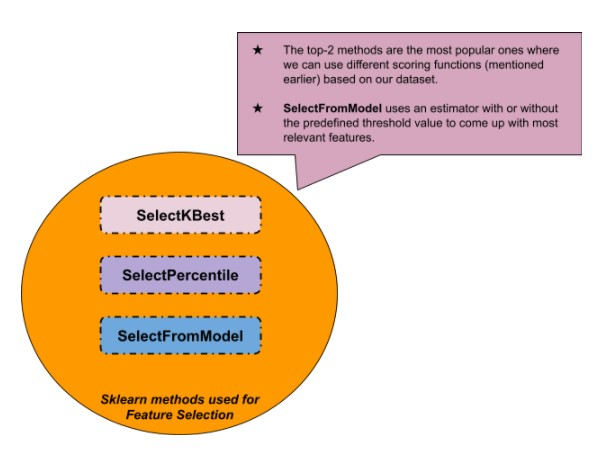

In [7]:
from IPython.display import Image

path = 'E:\STUDY\PROJECTS\AAIC_Practice\MODULES\Module_3\Mod_3_Feature_Encoding\Feature_Selection_Pics\\'
Image(filename = path + "1_6_Sklearn_selection_methods.jpg", width=800, height=800)

**`SelectKBest` removes all but the highest scoring features**

**`SelectPercentile` removes all but a user-specified highest scoring percentage of features**

### **Regression_Problem**

In [8]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_regression

In [9]:
X, y = make_regression(n_samples=200,n_features=20,n_informative=10,n_targets=1,noise=0.1)

In [10]:
col_names = ['F'+str(val) for val in range(20)]
print(col_names)

X = pd.DataFrame(X,columns=col_names)

print(X.shape, y.shape)

['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19']
(200, 20) (200,)


In [11]:
X.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,0.315769,0.750800,-1.159184,0.819769,1.606124,0.446812,2.038095,1.743551,0.792619,1.690988,0.284038,-0.882442,0.253044,-0.730733,-0.256267,-1.105044,1.242850,-0.298262,0.036702,0.052869
1,-0.143725,-1.241941,0.966777,0.949195,0.964779,0.511315,-1.242663,-0.014709,0.546720,-0.177172,0.930303,-2.231900,-0.760004,-0.778257,-0.891855,-0.325833,1.133806,0.707592,-0.095713,0.722508
2,-1.098011,1.164003,-0.592007,-0.516271,1.186933,-0.104987,1.223629,-0.297363,1.524908,1.395178,2.203024,0.478225,-0.076374,0.236323,-0.025825,-0.858813,0.142397,-0.806427,0.460964,0.773638
3,-0.369609,0.125479,-2.373186,-0.239607,-0.893253,0.699245,-1.140238,0.679197,0.163585,0.651298,-0.260664,0.716601,0.307621,1.669772,-1.021927,-0.034045,-1.116529,1.177020,0.197593,0.552747
4,-1.517370,-0.050348,0.622964,-1.062192,0.986427,-0.023659,1.843472,-2.098311,-1.011552,-0.510197,0.688407,-0.327679,-1.907879,-1.175474,0.319111,1.017710,1.191035,0.431128,-0.741902,1.441373


In [12]:
pd.DataFrame(y).head()

,0
0,71.635866
1,69.606926
2,260.585409
3,152.251792
4,57.432334


#### **`Case-1`**
##### **Selecting only top 4 features**

In [13]:
fs = SelectKBest(score_func=f_regression,k=4)

### **F_Regression**

**Univariate linear regression tests.**

**Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure, not a free standing feature selection procedure.**

This is done in 2 steps:
    
    - The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).

    - It is converted to an F score then to a p-value.

In [14]:
fs.fit(X,y)

SelectKBest(k=4, score_func=<function f_regression at 0x0000019B05909C80>)

In [15]:
fs_selected_features = pd.DataFrame(fs.transform(X))
fs_selected_features.head()

,0,1,2,3
0,0.446812,0.284038,-1.105044,0.052869
1,0.511315,0.930303,-0.325833,0.722508
2,-0.104987,2.203024,-0.858813,0.773638
3,0.699245,-0.260664,-0.034045,0.552747
4,-0.023659,0.688407,1.017710,1.441373


In [16]:
p_vals = np.round(pd.DataFrame(fs.pvalues_).T,5)
p_vals.columns = col_names

p_vals

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,0.37115,0.00002,0.23515,0.115,0.94458,0.0,0.00803,0.45473,0.00203,0.21641,0.0,0.85823,0.04538,0.00034,0.71667,0.0,0.96343,0.56071,0.00718,0.0


In [17]:
loc = 1.0
alpha = 1 - loc

manual_selected_cols = []
for feature in col_names:
    if p_vals[feature].values == alpha:
        manual_selected_cols.append(feature)

manual_selected_cols

['F5', 'F10', 'F15', 'F19']

#### **In the above cell, I have selected the `Level of Confidence` as 100% for testing purpose but we can select any threshold value. The only point here is that the higher this value the more relevant features are selected.**

#### **The `SelectKBest` works on the basis of selecting the top-k features with minimum p-vals or maximum F-statistic.**

In [18]:
## F-value or F-statstic calculated based on the linear regression test
np.round(fs.scores_,1)

array([ 0.8, 19.7,  1.4,  2.5,  0. , 41.2,  7.2,  0.6,  9.8,  1.5, 88.2,
        0. ,  4.1, 13.3,  0.1, 22. ,  0. ,  0.3,  7.4, 64.5])

In [19]:
f_stats, p_vals = fs.score_func(X,y)

In [20]:
pd.DataFrame(np.round(f_stats,3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.803,19.691,1.418,2.506,0.005,41.221,7.17,0.561,9.781,1.538,88.241,0.032,4.056,13.323,0.132,22.043,0.002,0.34,7.38,64.5


#### **Here, if we see the test statistic value of features (F5, F10, F15 and F19) are extremely high as compared to others. Thus, we can say that these are the top 4 features who are rejecting the null hypothesis i.e. no linear relation exists.**

In [21]:
pd.DataFrame(np.round(p_vals,5)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.37115,0.00002,0.23515,0.115,0.94458,0.0,0.00803,0.45473,0.00203,0.21641,0.0,0.85823,0.04538,0.00034,0.71667,0.0,0.96343,0.56071,0.00718,0.0


#### **P-values of features(F5, F10, F15 and F19) are also highly significant, also looking at the p-value of feature F1 suggests that it can be potentially the 5th best feature in this dataset.**

In [22]:
## Manually selected top-4 features based on self provided alpha value
X[manual_selected_cols].head()

,F5,F10,F15,F19
0,0.446812,0.284038,-1.105044,0.052869
1,0.511315,0.930303,-0.325833,0.722508
2,-0.104987,2.203024,-0.858813,0.773638
3,0.699245,-0.260664,-0.034045,0.552747
4,-0.023659,0.688407,1.017710,1.441373


In [23]:
## Features returned by SelectKBest
fs_selected_features.head()

,0,1,2,3
0,0.446812,0.284038,-1.105044,0.052869
1,0.511315,0.930303,-0.325833,0.722508
2,-0.104987,2.203024,-0.858813,0.773638
3,0.699245,-0.260664,-0.034045,0.552747
4,-0.023659,0.688407,1.017710,1.441373


In [24]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.803444
Feature 1: 19.690933
Feature 2: 1.418082
Feature 3: 2.506152
Feature 4: 0.004845
Feature 5: 41.220732
Feature 6: 7.170474
Feature 7: 0.561033
Feature 8: 9.781180
Feature 9: 1.537810
Feature 10: 88.240872
Feature 11: 0.031991
Feature 12: 4.055694
Feature 13: 13.322614
Feature 14: 0.132082
Feature 15: 22.042628
Feature 16: 0.002107
Feature 17: 0.339627
Feature 18: 7.379732
Feature 19: 64.500395


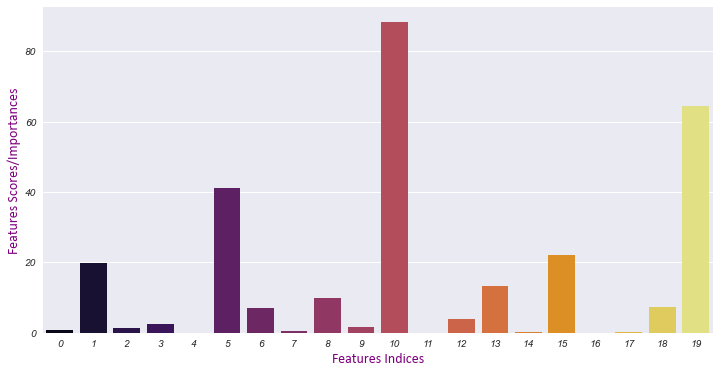

In [25]:
x1,y1 = [i for i in range(len(fs.scores_))], fs.scores_
data = pd.DataFrame({'x':x1,'y':y1})

with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,x=x1,y=y1,palette='inferno')
    plt.xlabel("Features Indices",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.ylabel("Features Scores/Importances",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.xticks(style='oblique',size=10)
    plt.yticks(style='oblique',size=10)
    plt.show()

#### **So, good here as everything matched and doubts are solved!!**

#### **`Case-1.2`**
##### **Selecting only top 4 features with `SelectPercentile`**

In [26]:
# Total number of features in the dataset is 20; I'm selecting top 20% of relevant features i.e. percentile = 20
fs_p = SelectPercentile(score_func=f_regression,percentile=20)

In [27]:
fs_p.fit(X,y)

SelectPercentile(percentile=20,
                 score_func=<function f_regression at 0x0000019B05909C80>)

In [28]:
fs_selected_features = pd.DataFrame(fs_p.transform(X))
fs_selected_features.head()

,0,1,2,3
0,0.446812,0.284038,-1.105044,0.052869
1,0.511315,0.930303,-0.325833,0.722508
2,-0.104987,2.203024,-0.858813,0.773638
3,0.699245,-0.260664,-0.034045,0.552747
4,-0.023659,0.688407,1.017710,1.441373


In [29]:
p_vals = np.round(pd.DataFrame(fs_p.pvalues_).T,5)
p_vals.columns = col_names

p_vals

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,0.37115,0.00002,0.23515,0.115,0.94458,0.0,0.00803,0.45473,0.00203,0.21641,0.0,0.85823,0.04538,0.00034,0.71667,0.0,0.96343,0.56071,0.00718,0.0


In [30]:
X.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,0.315769,0.750800,-1.159184,0.819769,1.606124,0.446812,2.038095,1.743551,0.792619,1.690988,0.284038,-0.882442,0.253044,-0.730733,-0.256267,-1.105044,1.242850,-0.298262,0.036702,0.052869
1,-0.143725,-1.241941,0.966777,0.949195,0.964779,0.511315,-1.242663,-0.014709,0.546720,-0.177172,0.930303,-2.231900,-0.760004,-0.778257,-0.891855,-0.325833,1.133806,0.707592,-0.095713,0.722508
2,-1.098011,1.164003,-0.592007,-0.516271,1.186933,-0.104987,1.223629,-0.297363,1.524908,1.395178,2.203024,0.478225,-0.076374,0.236323,-0.025825,-0.858813,0.142397,-0.806427,0.460964,0.773638
3,-0.369609,0.125479,-2.373186,-0.239607,-0.893253,0.699245,-1.140238,0.679197,0.163585,0.651298,-0.260664,0.716601,0.307621,1.669772,-1.021927,-0.034045,-1.116529,1.177020,0.197593,0.552747
4,-1.517370,-0.050348,0.622964,-1.062192,0.986427,-0.023659,1.843472,-2.098311,-1.011552,-0.510197,0.688407,-0.327679,-1.907879,-1.175474,0.319111,1.017710,1.191035,0.431128,-0.741902,1.441373


In [31]:
loc = 1.0
alpha = 1 - loc

manual_selected_cols = []
for feature in col_names:
    if p_vals[feature].values == alpha:
        manual_selected_cols.append(feature)

manual_selected_cols

['F5', 'F10', 'F15', 'F19']

#### **In the above cell, I have selected the `Level of Confidence` as 100% for testing purpose but we can select any threshold value. The only point here is that the higher this value the more relevant features are selected.**

#### **The `SelectKBest` works on the basis of selecting the top-k features with minimum p-vals or maximum F-statistic.**

In [32]:
## F-value or F-statstic calculated based on the linear regression test
np.round(fs_p.scores_,1)

array([ 0.8, 19.7,  1.4,  2.5,  0. , 41.2,  7.2,  0.6,  9.8,  1.5, 88.2,
        0. ,  4.1, 13.3,  0.1, 22. ,  0. ,  0.3,  7.4, 64.5])

In [33]:
f_stats, p_vals = fs_p.score_func(X,y)

In [34]:
pd.DataFrame(np.round(f_stats,3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.803,19.691,1.418,2.506,0.005,41.221,7.17,0.561,9.781,1.538,88.241,0.032,4.056,13.323,0.132,22.043,0.002,0.34,7.38,64.5


#### **Here, if we see the test statistic value of features (F5, F10, F15 and F19) are extremely high as compared to others. Thus, we can say that these are the top 4 features who are rejecting the null hypothesis i.e. no linear relation exists.**

In [35]:
pd.DataFrame(np.round(p_vals,5)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.37115,0.00002,0.23515,0.115,0.94458,0.0,0.00803,0.45473,0.00203,0.21641,0.0,0.85823,0.04538,0.00034,0.71667,0.0,0.96343,0.56071,0.00718,0.0


#### **P-values of features(F5, F10, F15 and F19) are also highly significant, also looking at the p-value of feature F1 suggests that it can be potentially the 5th best feature in this dataset.**

In [36]:
## Manually selected top-4 features based on self provided alpha value
X[manual_selected_cols].head()

,F5,F10,F15,F19
0,0.446812,0.284038,-1.105044,0.052869
1,0.511315,0.930303,-0.325833,0.722508
2,-0.104987,2.203024,-0.858813,0.773638
3,0.699245,-0.260664,-0.034045,0.552747
4,-0.023659,0.688407,1.017710,1.441373


In [37]:
## Features returned by SelectKBest
fs_selected_features.head()

,0,1,2,3
0,0.446812,0.284038,-1.105044,0.052869
1,0.511315,0.930303,-0.325833,0.722508
2,-0.104987,2.203024,-0.858813,0.773638
3,0.699245,-0.260664,-0.034045,0.552747
4,-0.023659,0.688407,1.017710,1.441373


In [38]:
for i in range(len(fs_p.scores_)):
    print('Feature %d: %f' % (i, fs_p.scores_[i]))

Feature 0: 0.803444
Feature 1: 19.690933
Feature 2: 1.418082
Feature 3: 2.506152
Feature 4: 0.004845
Feature 5: 41.220732
Feature 6: 7.170474
Feature 7: 0.561033
Feature 8: 9.781180
Feature 9: 1.537810
Feature 10: 88.240872
Feature 11: 0.031991
Feature 12: 4.055694
Feature 13: 13.322614
Feature 14: 0.132082
Feature 15: 22.042628
Feature 16: 0.002107
Feature 17: 0.339627
Feature 18: 7.379732
Feature 19: 64.500395


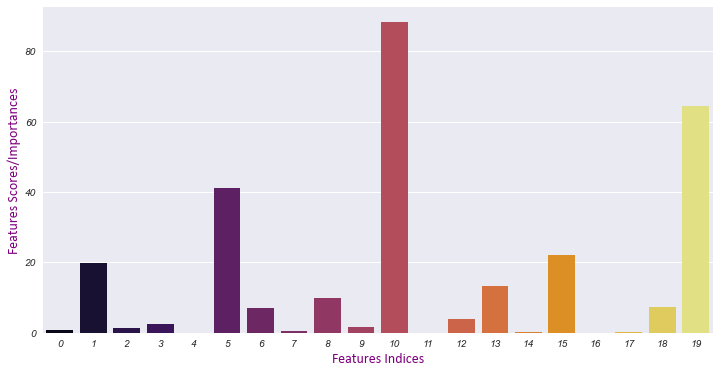

In [39]:
x1,y1 = [i for i in range(len(fs_p.scores_))], fs_p.scores_
data = pd.DataFrame({'x':x1,'y':y1})

with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,x=x1,y=y1,palette='inferno')
    plt.xlabel("Features Indices",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.ylabel("Features Scores/Importances",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.xticks(style='oblique',size=10)
    plt.yticks(style='oblique',size=10)
    plt.show()

#### **So, good here as every thing matched and doubts are solved!!**

#### **`Case-2`**
##### **Selecting top 8 features instead of 4**

In [40]:
fs = SelectKBest(score_func=f_regression,k=8)

In [41]:
fs.fit(X,y)

SelectKBest(k=8, score_func=<function f_regression at 0x0000019B05909C80>)

In [42]:
fs_selected_features = pd.DataFrame(fs.transform(X))
fs_selected_features.head()

,0,1,2,3,4,5,6,7
0,0.750800,0.446812,0.792619,0.284038,-0.730733,-1.105044,0.036702,0.052869
1,-1.241941,0.511315,0.546720,0.930303,-0.778257,-0.325833,-0.095713,0.722508
2,1.164003,-0.104987,1.524908,2.203024,0.236323,-0.858813,0.460964,0.773638
3,0.125479,0.699245,0.163585,-0.260664,1.669772,-0.034045,0.197593,0.552747
4,-0.050348,-0.023659,-1.011552,0.688407,-1.175474,1.017710,-0.741902,1.441373


In [43]:
p_vals = np.round(pd.DataFrame(fs.pvalues_).T,5)
p_vals.columns = col_names

p_vals

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,0.37115,0.00002,0.23515,0.115,0.94458,0.0,0.00803,0.45473,0.00203,0.21641,0.0,0.85823,0.04538,0.00034,0.71667,0.0,0.96343,0.56071,0.00718,0.0


In [44]:
loc = 0.99
alpha = 1 - loc

manual_selected_cols = []
for feature in col_names:
    if p_vals[feature].values < alpha:
        manual_selected_cols.append(feature)

manual_selected_cols

['F1', 'F5', 'F6', 'F8', 'F10', 'F13', 'F15', 'F18', 'F19']

#### **In the above cell, I have selected the `Level of Confidence` as 99% instead of 100% because I'm increasing the number of relevant features.**

#### **The `SelectKBest` works on the basis of selecting the top-k features with minimum p-vals or maximum F-statistic.**

In [45]:
## F-value or F-statstic calculated based on the linear regression test
fs.scores_   

array([8.03444130e-01, 1.96909331e+01, 1.41808170e+00, 2.50615240e+00,
       4.84485790e-03, 4.12207323e+01, 7.17047427e+00, 5.61033056e-01,
       9.78117974e+00, 1.53780952e+00, 8.82408724e+01, 3.19905479e-02,
       4.05569406e+00, 1.33226136e+01, 1.32082232e-01, 2.20426284e+01,
       2.10745892e-03, 3.39626752e-01, 7.37973153e+00, 6.45003951e+01])

In [46]:
f_stats, p_vals = fs.score_func(X,y)

In [47]:
pd.DataFrame(np.round(f_stats,3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.803,19.691,1.418,2.506,0.005,41.221,7.17,0.561,9.781,1.538,88.241,0.032,4.056,13.323,0.132,22.043,0.002,0.34,7.38,64.5


#### **Here, if we see the test statistic values of features (F1, F5, F6, F8, F10, F13, F15, F18 and F19) are high as compared to others. Thus, we can say that these are the top 8 features who are rejecting the null hypothesis i.e. no linear relation exists.**

In [48]:
pd.DataFrame(np.round(p_vals,5)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.37115,0.00002,0.23515,0.115,0.94458,0.0,0.00803,0.45473,0.00203,0.21641,0.0,0.85823,0.04538,0.00034,0.71667,0.0,0.96343,0.56071,0.00718,0.0


#### **P-values of features(F1, F5, F6, F8, F10, F13, F15, F18 and F19) are also highly significant.**

In [49]:
## Manually selected top-4 features based on self provided alpha value
X[manual_selected_cols].head()

,F1,F5,F6,F8,F10,F13,F15,F18,F19
0,0.750800,0.446812,2.038095,0.792619,0.284038,-0.730733,-1.105044,0.036702,0.052869
1,-1.241941,0.511315,-1.242663,0.546720,0.930303,-0.778257,-0.325833,-0.095713,0.722508
2,1.164003,-0.104987,1.223629,1.524908,2.203024,0.236323,-0.858813,0.460964,0.773638
3,0.125479,0.699245,-1.140238,0.163585,-0.260664,1.669772,-0.034045,0.197593,0.552747
4,-0.050348,-0.023659,1.843472,-1.011552,0.688407,-1.175474,1.017710,-0.741902,1.441373


In [50]:
## Features returned by SelectKBest
fs_selected_features.head()

,0,1,2,3,4,5,6,7
0,0.750800,0.446812,0.792619,0.284038,-0.730733,-1.105044,0.036702,0.052869
1,-1.241941,0.511315,0.546720,0.930303,-0.778257,-0.325833,-0.095713,0.722508
2,1.164003,-0.104987,1.524908,2.203024,0.236323,-0.858813,0.460964,0.773638
3,0.125479,0.699245,0.163585,-0.260664,1.669772,-0.034045,0.197593,0.552747
4,-0.050348,-0.023659,-1.011552,0.688407,-1.175474,1.017710,-0.741902,1.441373


In [51]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.803444
Feature 1: 19.690933
Feature 2: 1.418082
Feature 3: 2.506152
Feature 4: 0.004845
Feature 5: 41.220732
Feature 6: 7.170474
Feature 7: 0.561033
Feature 8: 9.781180
Feature 9: 1.537810
Feature 10: 88.240872
Feature 11: 0.031991
Feature 12: 4.055694
Feature 13: 13.322614
Feature 14: 0.132082
Feature 15: 22.042628
Feature 16: 0.002107
Feature 17: 0.339627
Feature 18: 7.379732
Feature 19: 64.500395


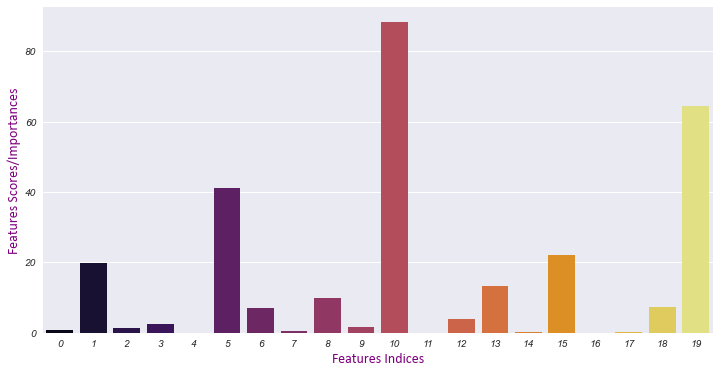

In [52]:
x1,y1 = [i for i in range(len(fs.scores_))], fs.scores_
data = pd.DataFrame({'x':x1,'y':y1})

with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,x=x1,y=y1,palette='inferno')
    plt.xlabel("Features Indices",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.ylabel("Features Scores/Importances",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.xticks(style='oblique',size=10)
    plt.yticks(style='oblique',size=10)
    plt.show()

#### **So, good here as everything matched and doubts are solved!!**
##### **The point to remember here is that `SelectKBest` runs a `statistical test(passed as an input parameter)` or a `scoring_function` at the backend and based on p-values or test statistics it filters the top dataset representing features.**

### **Classification_Problem**

In [53]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, mutual_info_regression

In [54]:
X, y = make_classification(n_samples=200,n_features=15,n_informative=6,n_classes=3)

In [55]:
X.shape, y.shape

((200, 15), (200,))

In [56]:
col_names = ['F'+str(val) for val in range(15)]
print(col_names)

X = pd.DataFrame(X,columns=col_names)

print(X.shape, y.shape)

['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14']
(200, 15) (200,)


In [57]:
X.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,0.617210,0.077013,-0.894102,-0.781200,1.433713,-0.656310,1.233136,0.889938,2.348430,-0.980309,2.307657,0.571762,1.085014,3.410207,1.551725
1,-0.550493,-0.635994,-0.315456,-2.021173,-3.234403,1.008197,3.562111,0.252936,0.113089,-0.278497,-2.619302,-0.648765,-1.606169,-0.167694,0.934084
2,0.737995,-1.563568,-3.159686,-0.559418,0.963973,1.843948,1.642310,-0.432715,-0.293203,-0.173245,3.295914,-0.017604,0.125203,2.142418,0.438327
3,1.189695,-0.675657,-1.026329,-1.739962,1.326861,0.250127,-0.150608,-0.240283,1.222818,0.315598,-0.825527,1.062089,1.066760,-1.019253,-1.158147
4,0.831337,-1.938871,0.438057,1.947839,1.245345,0.525033,0.623199,2.207218,0.070794,1.672367,0.021330,-0.342248,-0.458197,3.189145,-1.346295


In [58]:
np.unique(y), np.bincount(y), pd.DataFrame(y).head()

(array([0, 1, 2]),
 array([67, 67, 66], dtype=int64),
    0
 0  0
 1  0
 2  0
 3  1
 4  2)

#### **`Case:1`**
##### **Selecting only top 5 features**

In [59]:
fs = SelectKBest(score_func=f_classif,k=5)

### **F_Classif**

**Compute the ANOVA F-value for the provided sample.**

In [60]:
fs.fit(X,y)

SelectKBest(k=5)

In [61]:
fs_selected_features = pd.DataFrame(fs.transform(X))
fs_selected_features.head()

,0,1,2,3,4
0,-0.781200,1.433713,0.889938,2.307657,3.410207
1,-2.021173,-3.234403,0.252936,-2.619302,-0.167694
2,-0.559418,0.963973,-0.432715,3.295914,2.142418
3,-1.739962,1.326861,-0.240283,-0.825527,-1.019253
4,1.947839,1.245345,2.207218,0.021330,3.189145


In [62]:
p_vals = np.round(pd.DataFrame(fs.pvalues_).T,5)
p_vals.columns = col_names

p_vals

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,0.38543,0.93467,0.00293,0.0,0.0,0.87692,0.01381,0.00015,0.71355,0.2917,0.0,0.62029,0.25394,0.0,0.00184


In [63]:
loc = 0.99
alpha = 1 - loc

manual_selected_cols = []
for feature in col_names:
    if p_vals[feature].values < alpha:
        manual_selected_cols.append(feature)

manual_selected_cols

['F2', 'F3', 'F4', 'F7', 'F10', 'F13', 'F14']

#### **In the above cell, I have selected the `Level of Confidence` as 99% and based on it top-5 features are printed.**

In [64]:
## F-value or F-statstic calculated based on the linear regression test
fs.scores_   

array([ 0.95801214,  0.06758588,  6.00767971, 51.04637477, 34.4121281 ,
        0.13142818,  4.37647881,  9.20382652,  0.33808061,  1.23977527,
       24.25573132,  0.47872054,  1.38023315, 22.86703697,  6.50653816])

In [65]:
f_stats, p_vals = fs.score_func(X,y)

In [66]:
pd.DataFrame(np.round(f_stats,3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.958,0.068,6.008,51.046,34.412,0.131,4.376,9.204,0.338,1.24,24.256,0.479,1.38,22.867,6.507


#### **Here, if we see the test statistic values of features (F3, F4, F10, F7 and F13) are high as compared to others. Thus, we can say that these are the top 5 features who are rejecting the null hypothesis i.e. no linear relation exists.**

In [67]:
pd.DataFrame(np.round(p_vals,5)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.38543,0.93467,0.00293,0.0,0.0,0.87692,0.01381,0.00015,0.71355,0.2917,0.0,0.62029,0.25394,0.0,0.00184


#### **P-values of features(F3, F4, F10, F7 and F13) are also highly significant.**

In [68]:
## Manually selected top-4 features based on self provided alpha value
X[manual_selected_cols].head()

,F2,F3,F4,F7,F10,F13,F14
0,-0.894102,-0.781200,1.433713,0.889938,2.307657,3.410207,1.551725
1,-0.315456,-2.021173,-3.234403,0.252936,-2.619302,-0.167694,0.934084
2,-3.159686,-0.559418,0.963973,-0.432715,3.295914,2.142418,0.438327
3,-1.026329,-1.739962,1.326861,-0.240283,-0.825527,-1.019253,-1.158147
4,0.438057,1.947839,1.245345,2.207218,0.021330,3.189145,-1.346295


In [69]:
## Features returned by SelectKBest
fs_selected_features.head()

,0,1,2,3,4
0,-0.781200,1.433713,0.889938,2.307657,3.410207
1,-2.021173,-3.234403,0.252936,-2.619302,-0.167694
2,-0.559418,0.963973,-0.432715,3.295914,2.142418
3,-1.739962,1.326861,-0.240283,-0.825527,-1.019253
4,1.947839,1.245345,2.207218,0.021330,3.189145


In [70]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.958012
Feature 1: 0.067586
Feature 2: 6.007680
Feature 3: 51.046375
Feature 4: 34.412128
Feature 5: 0.131428
Feature 6: 4.376479
Feature 7: 9.203827
Feature 8: 0.338081
Feature 9: 1.239775
Feature 10: 24.255731
Feature 11: 0.478721
Feature 12: 1.380233
Feature 13: 22.867037
Feature 14: 6.506538


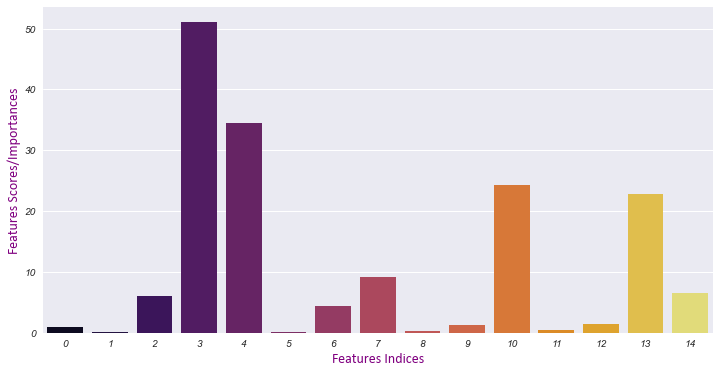

In [71]:
x1,y1 = [i for i in range(len(fs.scores_))], fs.scores_
data = pd.DataFrame({'x':x1,'y':y1})

with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,x=x1,y=y1,palette='inferno')
    plt.xlabel("Features Indices",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.ylabel("Features Scores/Importances",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.xticks(style='oblique',size=10)
    plt.yticks(style='oblique',size=10)
    plt.show()

#### **So, good here as everything matched and doubts are solved!!**

#### **`Case:2`**
##### **Only `Categorical` Explanatory Variables :: Selecting only top 5 features**

In [72]:
import scipy.io.arff as arff
import os

In [73]:
path = os.getcwd()
file = path + '\\Autism-Child-Data.arff'
print(file)

E:\STUDY\PROJECTS\AAIC_Practice\MODULES\Module_3\Mod_3_Feature_Encoding\Autism-Child-Data.arff


In [74]:
arff.loadarff(file)[1]

Dataset: child
	A1_Score's type is nominal, range is ('0', '1')
	A2_Score's type is nominal, range is ('0', '1')
	A3_Score's type is nominal, range is ('0', '1')
	A4_Score's type is nominal, range is ('0', '1')
	A5_Score's type is nominal, range is ('0', '1')
	A6_Score's type is nominal, range is ('0', '1')
	A7_Score's type is nominal, range is ('0', '1')
	A8_Score's type is nominal, range is ('0', '1')
	A9_Score's type is nominal, range is ('0', '1')
	A10_Score's type is nominal, range is ('0', '1')
	age's type is numeric
	gender's type is nominal, range is ('m', 'f')
	ethnicity's type is nominal, range is ('Others', 'Middle Eastern ', 'White-European', 'Black', 'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish', 'Latino')
	jundice's type is nominal, range is ('no', 'yes')
	austim's type is nominal, range is ('no', 'yes')
	contry_of_res's type is nominal, range is ('Jordan', 'United States', 'Egypt', 'United Kingdom', 'Bahrain', 'Austria', 'Kuwait', 'United Arab Emirates', 'Eur

In [75]:
def apply_decode(df_name):
    """
    Description: Function created for changing the character encoding
    
    Input: It accepts one parameter:
        df_name : `Pandas DataFrame`
    
    Return: `utf-8` encoded DataFrame
    """
    for col in df_name.columns:
        if df_name[col].dtype != 'float64':
            df_name[col] = df_name[col].apply(lambda val : val.decode('utf-8'))
    pd.set_option('display.max_columns',50)
    return df_name

In [76]:
autism_dataset = pd.DataFrame(arff.loadarff(file)[0])
autism_dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',...,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


In [77]:
autism_df = apply_decode(autism_dataset)

In [78]:
autism_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6.0,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6.0,m,?,no,no,Jordan,yes,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,?,yes,no,Jordan,no,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES


In [79]:
X_category_data = autism_df[['ethnicity', 'contry_of_res', 'relation']].copy(deep=True)
X_category_data.head()

,ethnicity,contry_of_res,relation
0,Others,Jordan,Parent
1,Middle Eastern,Jordan,Parent
2,?,Jordan,?
3,?,Jordan,?
4,Others,United States,Parent


In [80]:
X_category_data = X_category_data.applymap(lambda val: None if val == '?' else val)

In [81]:
X_category_data.isnull().sum()

ethnicity        43
contry_of_res     0
relation         43
dtype: int64

In [82]:
X_category_data['ethnicity'].value_counts()

White-European     108
Asian               46
Middle Eastern      27
South Asian         21
Others              14
Black               14
Latino               8
Hispanic             7
Pasifika             2
Turkish              2
Name: ethnicity, dtype: int64

In [83]:
X_category_data['relation'].value_counts()

Parent                      214
Relative                     17
Health care professional     13
Self                          4
self                          1
Name: relation, dtype: int64

In [84]:
X_category_data['ethnicity'].fillna(value='White-European',axis=0,inplace=True)
X_category_data['relation'].fillna(value='Parent',axis=0,inplace=True)

In [85]:
X_category_data.isnull().sum()

ethnicity        0
contry_of_res    0
relation         0
dtype: int64

In [86]:
X_category_data.head()

,ethnicity,contry_of_res,relation
0,Others,Jordan,Parent
1,Middle Eastern,Jordan,Parent
2,White-European,Jordan,Parent
3,White-European,Jordan,Parent
4,Others,United States,Parent


In [87]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

#### **Diff_b/w_LE_and_OE**

1. Both of these techniques performs the same function, as they do the numerical encoding on categorical data. Point to note that Ordinal Encoder sounds like it performs Ordinal numerical encoding on the data but it also fails to perform the semantic ordinal encoding.
    - For example; hot, cold, warm are labelled as cold,hot,warm by both the techniques whereas these should be labelled as cold<warm<hot.
    - We need to provide the explicit linking in order to perfrom semantic ordinal encoding.


2. Scikit learn has these 2 implementations for same task because Label Encoder is created for applying encoding of Target Variable and Ordinal Encoder for features.
    - Because, 
        - LabelEncoder learns classes_
        - OrdinalEncoder learns categories_
    - And,
        - LabelEncoder expects 1D array i.e. Target Variable
        - OrdinalEncoder expects 2D array i.e. Features

In [88]:
le = LabelEncoder()
oe = OrdinalEncoder()

In [89]:
le.fit(X_category_data['ethnicity'])

LabelEncoder()

In [90]:
le.classes_

array(['Asian', 'Black', 'Hispanic', 'Latino', 'Middle Eastern ',
       'Others', 'Pasifika', 'South Asian', 'Turkish', 'White-European'],
      dtype=object)

#### **The above list of various categories are in the sequence of lables assigned to each category.**
- **For example, 'Asian' -- 0, 'Black -- 1, 'Hispanic' -- 2 .... so on.**

In [91]:
X_category_data['ethnicity'] = le.transform(X_category_data['ethnicity'])
X_category_data.head()

,ethnicity,contry_of_res,relation
0,5,Jordan,Parent
1,4,Jordan,Parent
2,9,Jordan,Parent
3,9,Jordan,Parent
4,5,United States,Parent


In [92]:
cntry_le = LabelEncoder()
cntry_le.fit(X_category_data['contry_of_res'])

LabelEncoder()

In [93]:
cntry_le.classes_

array(['Afghanistan', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Bhutan', 'Brazil', 'Bulgaria', 'Canada',
       'China', 'Costa Rica', 'Egypt', 'Europe', 'Georgia', 'Germany',
       'Ghana', 'India', 'Iraq', 'Ireland', 'Isle of Man', 'Italy',
       'Japan', 'Jordan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya',
       'Malaysia', 'Malta', 'Mexico', 'Nepal', 'Netherlands',
       'New Zealand', 'Nigeria', 'Oman', 'Pakistan', 'Philippines',
       'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'South Africa',
       'South Korea', 'Sweden', 'Syria', 'Turkey',
       'U.S. Outlying Islands', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [94]:
X_category_data['contry_of_res'] = cntry_le.transform(X_category_data['contry_of_res'])
X_category_data.head()

,ethnicity,contry_of_res,relation
0,5,24,Parent
1,4,24,Parent
2,9,24,Parent
3,9,24,Parent
4,5,51,Parent


In [95]:
X_category_data['relation'] = X_category_data['relation'].apply(lambda val: str(val).capitalize())
X_category_data['relation'].value_counts()

Parent                      257
Relative                     17
Health care professional     13
Self                          5
Name: relation, dtype: int64

In [96]:
oe.fit(X_category_data[['relation']])

OrdinalEncoder()

In [97]:
oe.categories_

[array(['Health care professional', 'Parent', 'Relative', 'Self'],
       dtype=object)]

In [98]:
X_category_data['relation'] = pd.DataFrame(oe.transform(X_category_data[['relation']]))
X_category_data.head()

,ethnicity,contry_of_res,relation
0,5,24,1.0
1,4,24,1.0
2,9,24,1.0
3,9,24,1.0
4,5,51,1.0


In [99]:
pred_dict = {'NO':0,'YES':1}
y_cat_data = autism_df['Class/ASD']
y_cat_data = y_cat_data.apply(lambda val: pred_dict.get(val))

In [100]:
X_category_data.shape, y_cat_data.shape

((292, 3), (292,))

In [101]:
fs = SelectKBest(score_func=mutual_info_classif,k=1)

### **Mutual_info_classif**

- Estimate mutual information for a discrete target variable.

- **Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.**

- **The term “discrete features” is used instead of naming them “categorical”, because it describes the essence more accurately.**  For example, pixel intensities of an image are discrete features (but hardly categorical) and you will get better results if mark them as such. Also note, that treating a continuous variable as discrete and vice versa will usually give incorrect results, so be attentive about that.

- **True mutual information can’t be negative. If its estimate turns out to be negative, it is replaced by zero.**

In [102]:
fs.fit(X_category_data,y_cat_data)

SelectKBest(k=1,
            score_func=<function mutual_info_classif at 0x0000019B05C91048>)

In [103]:
fs.scores_

array([0.01284735, 0.03797437, 0.        ])

In [104]:
fs.score_func(X_category_data,y_cat_data)

array([0.017547  , 0.06310153, 0.        ])

In [105]:
pd.DataFrame(fs.transform(X_category_data)).head()

,0
0,24.0
1,24.0
2,24.0
3,24.0
4,51.0


In [106]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.012847
Feature 1: 0.037974
Feature 2: 0.000000


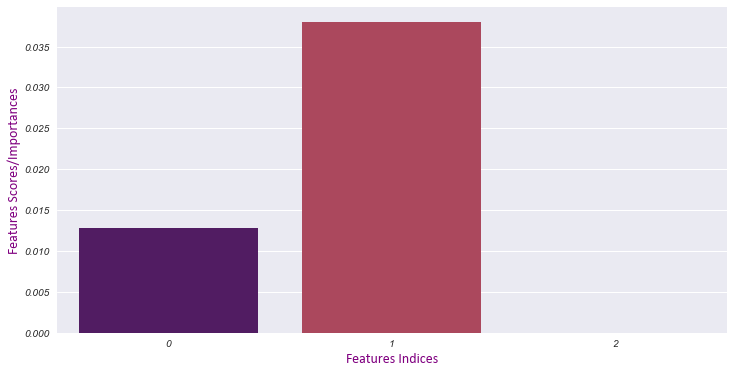

In [107]:
x1,y1 = [i for i in range(len(fs.scores_))], fs.scores_
data = pd.DataFrame({'x':x1,'y':y1})

with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,x=x1,y=y1,palette='inferno')
    plt.xlabel("Features Indices",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.ylabel("Features Scores/Importances",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.xticks(style='oblique',size=10)
    plt.yticks(style='oblique',size=10)
    plt.show()

#### **Feature with maximum MI score is selected as the relevant feature. Now, looking at the scores we can say that these features have very slight dependency on the target variable.**

#### **`Case:3`**
##### **`Categorical` Explanatory & Target Variables**

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [109]:
cat_data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv',header=None)

In [110]:
X = cat_data.iloc[:,0:-1].copy(deep=True)
y = cat_data.iloc[:,-1].copy(deep=True)

In [111]:
X.shape, y.shape

((286, 9), (286,))

In [112]:
X.isnull().sum()

0    0
1    0
2    0
3    0
4    8
5    0
6    0
7    1
8    0
dtype: int64

In [113]:
si = SimpleImputer(strategy='most_frequent')

In [114]:
X[4] = pd.DataFrame(si.fit_transform(X[[4]]))

In [115]:
X[7] = pd.DataFrame(si.fit_transform(X[[7]]))

In [116]:
X.head(), y.head()

(         0          1        2      3      4    5        6           7      8
 0  '40-49'  'premeno'  '15-19'  '0-2'  'yes'  '3'  'right'   'left_up'   'no'
 1  '50-59'     'ge40'  '15-19'  '0-2'   'no'  '1'  'right'   'central'   'no'
 2  '50-59'     'ge40'  '35-39'  '0-2'   'no'  '2'   'left'  'left_low'   'no'
 3  '40-49'  'premeno'  '35-39'  '0-2'  'yes'  '3'  'right'  'left_low'  'yes'
 4  '40-49'  'premeno'  '30-34'  '3-5'  'yes'  '2'   'left'  'right_up'   'no',
 0       'recurrence-events'
 1    'no-recurrence-events'
 2       'recurrence-events'
 3    'no-recurrence-events'
 4       'recurrence-events'
 Name: 9, dtype: object)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=33,stratify=y)

In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((185, 9), (101, 9), (185,), (101,))

In [119]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [120]:
oe.fit(X_train)
le.fit(y_train)

LabelEncoder()

In [121]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((185, 9), (101, 9), (185,), (101,))

#### **`Case:3.1`**
##### **With Chi-Squared Scoring Function**

In [123]:
fs = SelectKBest(score_func=chi2,k='all')

#### **`Chi-Squared`**

- **Compute chi-squared stats between each non-negative feature and class.**

- **This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.**

#### **Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.**

In [124]:
fs.fit(X_train,y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x0000019B05909AE8>)

In [125]:
pd.DataFrame(fs.transform(X_train)).head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0
2,3.0,2.0,5.0,0.0,0.0,2.0,0.0,1.0,0.0
3,3.0,0.0,4.0,0.0,0.0,2.0,0.0,4.0,0.0
4,2.0,2.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0


In [126]:
pd.DataFrame(fs.transform(X_test)).head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0
1,3.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
2,2.0,2.0,4.0,0.0,0.0,2.0,0.0,4.0,0.0
3,2.0,2.0,6.0,6.0,1.0,1.0,1.0,4.0,1.0
4,3.0,2.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0


In [127]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.004460
Feature 1: 0.043274
Feature 2: 4.807863
Feature 3: 61.981838
Feature 4: 10.479021
Feature 5: 6.011364
Feature 6: 0.294110
Feature 7: 1.365009
Feature 8: 9.455277


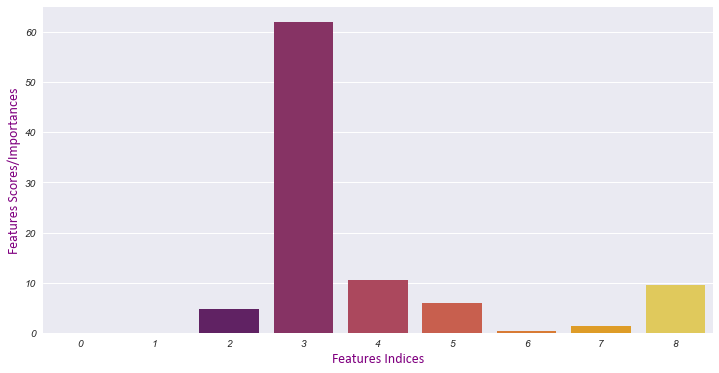

In [128]:
x1,y1 = [i for i in range(len(fs.scores_))], fs.scores_
data = pd.DataFrame({'x':x1,'y':y1})

with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,x=x1,y=y1,palette='inferno')
    plt.xlabel("Features Indices",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.ylabel("Features Scores/Importances",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.xticks(style='oblique',size=10)
    plt.yticks(style='oblique',size=10)
    plt.show()

#### **`Case:3.2`**
##### **With Mutual Information Scoring Function**

In [129]:
fs = SelectKBest(score_func=mutual_info_classif,k='all')

In [130]:
fs.fit(X_train,y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x0000019B05C91048>)

In [131]:
pd.DataFrame(fs.transform(X_train)).head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0
2,3.0,2.0,5.0,0.0,0.0,2.0,0.0,1.0,0.0
3,3.0,0.0,4.0,0.0,0.0,2.0,0.0,4.0,0.0
4,2.0,2.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0


In [132]:
pd.DataFrame(fs.transform(X_test)).head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0
1,3.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
2,2.0,2.0,4.0,0.0,0.0,2.0,0.0,4.0,0.0
3,2.0,2.0,6.0,6.0,1.0,1.0,1.0,4.0,1.0
4,3.0,2.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0


In [133]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.012467
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.050990
Feature 4: 0.000000
Feature 5: 0.070850
Feature 6: 0.000000
Feature 7: 0.021693
Feature 8: 0.000000


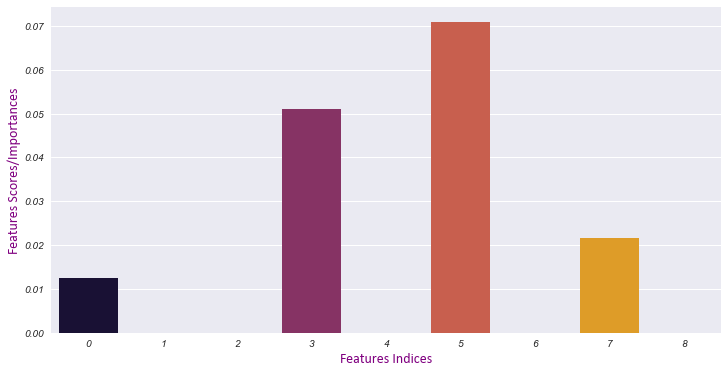

In [134]:
x1,y1 = [i for i in range(len(fs.scores_))], fs.scores_
data = pd.DataFrame({'x':x1,'y':y1})

with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,x=x1,y=y1,palette='inferno')
    plt.xlabel("Features Indices",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.ylabel("Features Scores/Importances",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.xticks(style='oblique',size=10)
    plt.yticks(style='oblique',size=10)
    plt.show()

#### **Chi-squared Function has given the weightage on 4th feature whereas Mutual_Info_Classif we have got some features with a score of 0 thus we can removed such features.**

### **Feature_Forward_Selection**

In [135]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

In [136]:
X_train.shape, y_train.shape

((185, 9), (185,))

In [144]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0
2,3.0,2.0,5.0,0.0,0.0,2.0,0.0,1.0,0.0
3,3.0,0.0,4.0,0.0,0.0,2.0,0.0,4.0,0.0
4,2.0,2.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0


In [137]:
dt = DecisionTreeClassifier()

In [138]:
ffs = SFS(estimator=dt,k_features=4,verbose=1,scoring='accuracy',cv=10)

#### **I have selected default DecisionTreeClassifier as the model for selecting top 4 features with cv as 10 and measuring accuracy; keeping verbose as want to see the logs**

In [139]:
ffs.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 3/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 4/4

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          k_features=4, scoring='accuracy', verbose=1)

In [140]:
ffs.k_feature_names_, ffs.k_feature_idx_, ffs.k_features, ffs.k_score_, ffs.subsets_

(('0', '3', '4', '5'),
 (0, 3, 4, 5),
 4,
 0.7394736842105264,
 {1: {'feature_idx': (0,),
   'cv_scores': array([0.68421053, 0.68421053, 0.68421053, 0.68421053, 0.68421053,
          0.72222222, 0.72222222, 0.72222222, 0.72222222, 0.72222222]),
   'avg_score': 0.703216374269006,
   'feature_names': ('0',)},
  2: {'feature_idx': (0, 4),
   'cv_scores': array([0.73684211, 0.68421053, 0.68421053, 0.78947368, 0.68421053,
          0.72222222, 0.77777778, 0.61111111, 0.77777778, 0.66666667]),
   'avg_score': 0.7134502923976609,
   'feature_names': ('0', '4')},
  3: {'feature_idx': (0, 4, 5),
   'cv_scores': array([0.73684211, 0.57894737, 0.78947368, 0.78947368, 0.68421053,
          0.61111111, 0.77777778, 0.83333333, 0.83333333, 0.61111111]),
   'avg_score': 0.724561403508772,
   'feature_names': ('0', '4', '5')},
  4: {'feature_idx': (0, 3, 4, 5),
   'cv_scores': array([0.78947368, 0.63157895, 0.84210526, 0.84210526, 0.78947368,
          0.61111111, 0.77777778, 0.77777778, 0.72222222, 0.

In [141]:
ffs.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.68421053, 0.68421053, 0.68421053, 0.68421053, 0.68421053,
         0.72222222, 0.72222222, 0.72222222, 0.72222222, 0.72222222]),
  'avg_score': 0.703216374269006,
  'feature_names': ('0',),
  'ci_bound': 0.014115889413033223,
  'std_dev': 0.01900584795321636,
  'std_err': 0.006335282651072119},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.73684211, 0.68421053, 0.68421053, 0.78947368, 0.68421053,
         0.72222222, 0.77777778, 0.61111111, 0.77777778, 0.66666667]),
  'avg_score': 0.7134502923976609,
  'feature_names': ('0', '4'),
  'ci_bound': 0.0406167147817032,
  'std_dev': 0.054686961828098415,
  'std_err': 0.018228987276032803},
 3: {'feature_idx': (0, 4, 5),
  'cv_scores': array([0.73684211, 0.57894737, 0.78947368, 0.78947368, 0.68421053,
         0.61111111, 0.77777778, 0.83333333, 0.83333333, 0.61111111]),
  'avg_score': 0.724561403508772,
  'feature_names': ('0', '4', '5'),
  'ci_bound': 0.06792728161477092,
  'std_dev': 

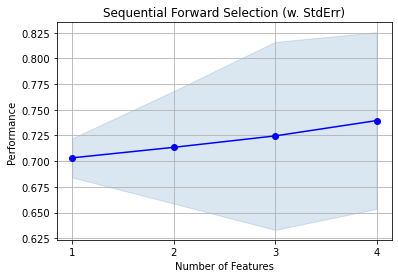

In [142]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(ffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

#### **With 1 feature we have 70% accuracy and with 4 features we have less than 75% so, not much of a rise.**

### **Backward_Elimination**

In [145]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

In [146]:
X_train.shape, y_train.shape

((185, 9), (185,))

In [147]:
dt = DecisionTreeClassifier()

In [148]:
be = SFS(estimator=dt,k_features=4,verbose=1,scoring='accuracy',cv=10,forward=False,floating=False)

#### **I have selected default DecisionTreeClassifier as the model for selecting top 4 features with cv as 10 and measuring accuracy; keeping verbose as want to see the logs**

In [149]:
be.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished
Features: 8/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/4

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          forward=False, k_features=4, scoring='accuracy',
                          verbose=1)

In [150]:
be.k_feature_names_, be.k_feature_idx_, be.k_features, be.k_score_, be.subsets_

(('3', '4', '6', '7'),
 (3, 4, 6, 7),
 4,
 0.7391812865497076,
 {9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
   'cv_scores': array([0.57894737, 0.57894737, 0.63157895, 0.68421053, 0.68421053,
          0.55555556, 0.5       , 0.66666667, 0.61111111, 0.5       ]),
   'avg_score': 0.5991228070175438,
   'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8')},
  8: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8),
   'cv_scores': array([0.73684211, 0.68421053, 0.73684211, 0.63157895, 0.63157895,
          0.66666667, 0.61111111, 0.61111111, 0.72222222, 0.55555556]),
   'avg_score': 0.6587719298245613,
   'feature_names': ('0', '1', '3', '4', '5', '6', '7', '8')},
  7: {'feature_idx': (1, 3, 4, 5, 6, 7, 8),
   'cv_scores': array([0.84210526, 0.78947368, 0.84210526, 0.68421053, 0.68421053,
          0.55555556, 0.83333333, 0.72222222, 0.72222222, 0.61111111]),
   'avg_score': 0.728654970760234,
   'feature_names': ('1', '3', '4', '5', '6', '7', '8')},
  6: {'feature_idx': (3, 4, 5, 6, 7

In [144]:
be.get_metric_dict()

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.57894737, 0.42105263, 0.52631579, 0.57894737, 0.63157895,
         0.55555556, 0.61111111, 0.66666667, 0.61111111, 0.5       ]),
  'avg_score': 0.5681286549707603,
  'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8'),
  'ci_bound': 0.05028776628006419,
  'std_dev': 0.06770821248736365,
  'std_err': 0.02256940416245455},
 8: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.78947368, 0.63157895, 0.73684211, 0.63157895, 0.63157895,
         0.61111111, 0.66666667, 0.55555556, 0.72222222, 0.5       ]),
  'avg_score': 0.6476608187134503,
  'feature_names': ('0', '1', '3', '4', '5', '6', '7', '8'),
  'ci_bound': 0.060513411565051994,
  'std_dev': 0.08147617664628949,
  'std_err': 0.02715872554876316},
 7: {'feature_idx': (1, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.84210526, 0.73684211, 0.94736842, 0.68421053, 0.63157895,
         0.55555556, 0.83333333, 0.77777778, 0.66666667, 0.61111111]

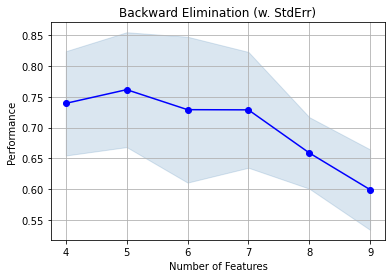

In [151]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(be.get_metric_dict(), kind='std_dev')
plt.title('Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

#### **So, clearly with all the features we are getting the least accuracy and by dropping 4 feature we got the significant amount of increase in the accuracy.**

### **Bi-Directional_Elimination**
##### **Also known as Step-wise Selection**

In [152]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

In [153]:
X_train.shape, y_train.shape

((185, 9), (185,))

In [154]:
dt = DecisionTreeClassifier()

In [155]:
bde = SFS(estimator=dt,k_features=4,verbose=1,scoring='accuracy',cv=10,forward=True,floating=True)

#### **I have selected default DecisionTreeClassifier as the model for selecting top 4 features with cv as 10 and measuring accuracy; keeping verbose as want to see the logs**

In [156]:
bde.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend w

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          floating=True, k_features=4, scoring='accuracy',
                          verbose=1)

In [157]:
bde.k_feature_names_, bde.k_feature_idx_, bde.k_features, bde.k_score_, bde.subsets_

(('1', '3', '4', '5'),
 (1, 3, 4, 5),
 4,
 0.7403508771929824,
 {1: {'feature_idx': (0,),
   'cv_scores': array([0.68421053, 0.68421053, 0.68421053, 0.68421053, 0.68421053,
          0.72222222, 0.72222222, 0.72222222, 0.72222222, 0.72222222]),
   'avg_score': 0.703216374269006,
   'feature_names': ('0',)},
  2: {'feature_idx': (4, 5),
   'cv_scores': array([0.84210526, 0.68421053, 0.78947368, 0.84210526, 0.63157895,
          0.66666667, 0.72222222, 0.83333333, 0.83333333, 0.66666667]),
   'avg_score': 0.7511695906432749,
   'feature_names': ('4', '5')},
  3: {'feature_idx': (3, 4, 5),
   'cv_scores': array([0.89473684, 0.73684211, 0.84210526, 0.84210526, 0.73684211,
          0.66666667, 0.77777778, 0.83333333, 0.66666667, 0.66666667]),
   'avg_score': 0.766374269005848,
   'feature_names': ('3', '4', '5')},
  4: {'feature_idx': (1, 3, 4, 5),
   'cv_scores': array([0.89473684, 0.68421053, 0.84210526, 0.63157895, 0.68421053,
          0.66666667, 0.77777778, 0.72222222, 0.77777778, 0.

In [158]:
bde.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.68421053, 0.68421053, 0.68421053, 0.68421053, 0.68421053,
         0.72222222, 0.72222222, 0.72222222, 0.72222222, 0.72222222]),
  'avg_score': 0.703216374269006,
  'feature_names': ('0',),
  'ci_bound': 0.014115889413033223,
  'std_dev': 0.01900584795321636,
  'std_err': 0.006335282651072119},
 2: {'feature_idx': (4, 5),
  'cv_scores': array([0.84210526, 0.68421053, 0.78947368, 0.84210526, 0.63157895,
         0.66666667, 0.72222222, 0.83333333, 0.83333333, 0.66666667]),
  'avg_score': 0.7511695906432749,
  'feature_names': ('4', '5'),
  'ci_bound': 0.06006910393311974,
  'std_dev': 0.08087795410076846,
  'std_err': 0.026959318033589485},
 3: {'feature_idx': (3, 4, 5),
  'cv_scores': array([0.89473684, 0.73684211, 0.84210526, 0.84210526, 0.73684211,
         0.66666667, 0.77777778, 0.83333333, 0.66666667, 0.66666667]),
  'avg_score': 0.766374269005848,
  'feature_names': ('3', '4', '5'),
  'ci_bound': 0.05947734563318215,
  'std_dev': 

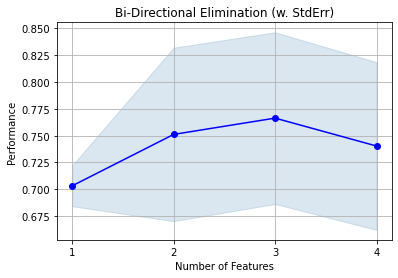

In [159]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(bde.get_metric_dict(), kind='std_dev')
plt.title('Bi-Directional Elimination (w. StdErr)')
plt.grid()
plt.show()

#### **From all the 3 wrapper methods features with index 3, 4 and 5 found to be important and more relevant.**

### **Lasso_Regularization**

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [162]:
lbc = load_breast_cancer()
X = pd.DataFrame(lbc.data,columns=lbc.feature_names)
y = lbc.target

In [163]:
X.shape, y.shape

((569, 30), (569,))

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,stratify=y,random_state=31)

In [165]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [166]:
ss = StandardScaler()
ss.fit(X_train)
X_train = pd.DataFrame(ss.transform(X_train),columns=lbc.feature_names)
X_test = pd.DataFrame(ss.transform(X_test),columns=lbc.feature_names)

In [199]:
log_reg=LogisticRegression(C=0.1,penalty='l1',solver='saga',max_iter=1000)

In [200]:
fs_model = SelectFromModel(estimator=log_reg,max_features=None)

In [201]:
fs_model.fit(X_train,y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                             solver='saga'))

In [202]:
fs_model.get_support()

array([False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False])

#### **True represents the important and non-zero features whereas False represents the not important features which are reduced to zero.**

In [228]:
selected_feat = X_train.columns[(fs_model.get_support())]

print('Total # of features : {}'.format((X_train.shape[1])))
print('Selected # of features : {}'.format(len(selected_feat)))
print('Features with coefficients reduced to zero : {}'.format(np.sum(fs_model.estimator_.coef_ == 0)))

Total # of features : 30
Selected # of features : 8
Features with coefficients reduced to zero : 22


#### **So, out of 30 features 22 have coefficients reduced to zero.**

In [204]:
fs_model.estimator_.coef_

array([[ 0.        , -0.00592324,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.20294899,  0.        ,  0.        ,
        -0.39338429,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.76305377, -0.58572198,  0.        ,  0.        , -0.13330742,
         0.        ,  0.        , -1.2335202 , -0.01267504,  0.        ]])

#### **None, of the features are contributing to the positive class as all the coefficients values are negative.**

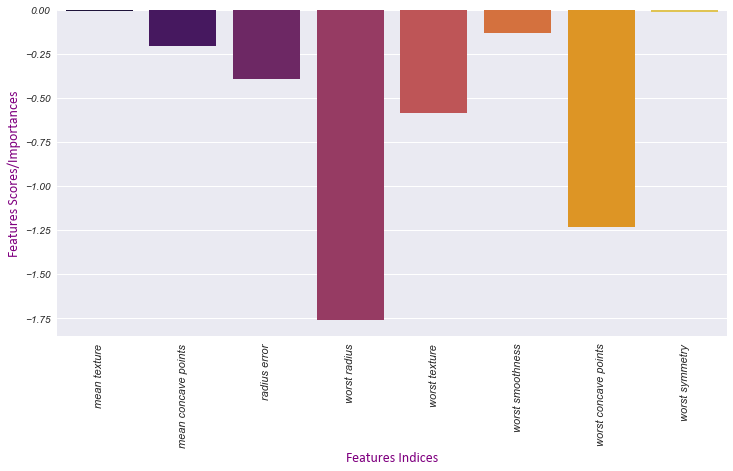

In [225]:
x1 = list(X_train.columns[fs_model.get_support()])
y1 = [val for val in np.ravel(fs_model.estimator_.coef_) if val != 0]
data = pd.DataFrame({'x':x1,'y':y1})

with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,x=x1,y=y1,palette='inferno')
    plt.xlabel("Features Indices",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.ylabel("Features Scores/Importances",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.xticks(style='oblique',size=11,rotation=90)
    plt.yticks(style='oblique',size=10)
    plt.show()

### **Ridge_Regularization**

In [231]:
log_reg=LogisticRegression(C=0.1,penalty='l2',solver='liblinear',max_iter=1000)

In [232]:
fs_model = SelectFromModel(estimator=log_reg,max_features=None)

In [233]:
fs_model.fit(X_train,y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, max_iter=1000,
                                             solver='liblinear'))

In [234]:
fs_model.get_support()

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

#### **True represents the important and non-zero features whereas False represents the non important features whose coefficeints are not reduced to zero.**

In [235]:
selected_feat = X_train.columns[(fs_model.get_support())]

print('Total # of features : {}'.format((X_train.shape[1])))
print('Selected # of features : {}'.format(len(selected_feat)))
print('Features with coefficients reduced to zero : {}'.format(np.sum(fs_model.estimator_.coef_ == 0)))

Total # of features : 30
Selected # of features : 17
Features with coefficients reduced to zero : 0


#### **So, out of 30 features 17 are the selected ones and non of these have coefficients as zero.**

In [241]:
print(list(selected_feat))

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry']


In [236]:
fs_model.estimator_.coef_

array([[-0.32925815, -0.38228505, -0.32000584, -0.34942425, -0.14031226,
         0.02359884, -0.32972925, -0.39175709, -0.16889698,  0.19330738,
        -0.49726163,  0.03570765, -0.39143521, -0.3878194 ,  0.00996934,
         0.23290519,  0.02145989, -0.11265373,  0.11930292,  0.25700381,
        -0.47666789, -0.50442501, -0.44223413, -0.46859447, -0.40973943,
        -0.08164383, -0.38931172, -0.46024621, -0.32459793, -0.05973215]])

In [244]:
fs_model.threshold_

0.2770428874008997

#### **None, of the features from selectd ones are contributing to the positive class as all the coefficients values are negative.**

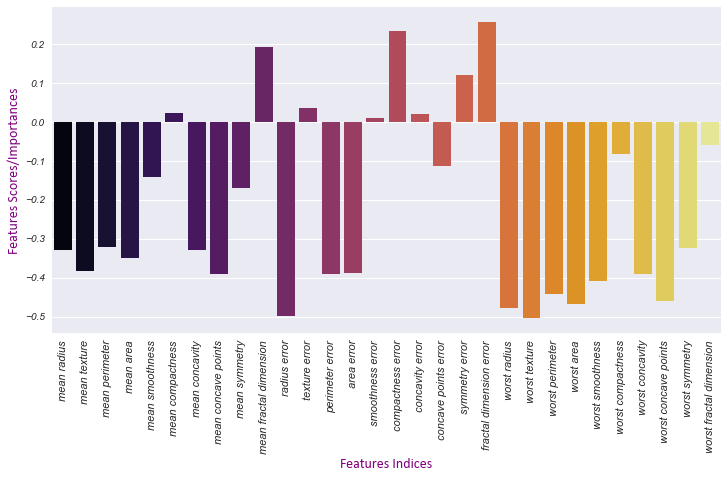

In [238]:
x1 = X_train.columns
y1 = [val for val in np.ravel(fs_model.estimator_.coef_)]
data = pd.DataFrame({'x':x1,'y':y1})

with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,x=x1,y=y1,palette='inferno')
    plt.xlabel("Features Indices",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.ylabel("Features Scores/Importances",fontdict={'size':14,'family':'calibri','color':'purple'})
    plt.xticks(style='oblique',size=11,rotation=90)
    plt.yticks(style='oblique',size=10)
    plt.show()

#### **As compared to Lasso Regression some of the features here are contributing for +ve class as well.**

### **Permutation_Importance**
#### ***`How important this feature is for a particular model?`***

- Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. 
- This is especially useful for non-linear or opaque estimators. 
- The permutation feature importance is defined to bring the decrease in a model score when a single feature value is randomly shuffled.
- This procedure breaks the relationship between the feature and the target, which means the drop in the model score is indicative of how much the model depends on the feature.
- This technique benefits from being model agnostic (means model independent) and can be calculated many times with different permutations of the feature.
- The permutation_importance function calculates the feature importance of estimators for a given dataset. The n_repeats parameter sets the number of times a feature is randomly shuffled and returns a sample of feature importances.



https://scikit-learn.org/stable/modules/permutation_importance.html

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

#### **`Permutation importances can be computed either on the training set or on a held-out testing or validation set. Using a held-out set makes it possible to highlight which features contribute the most to the generalization power of the inspected model. Features that are important on the training set but not on the held-out set might cause the model to overfit.`**

#### **`Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model. Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model.`**

In [252]:
from sklearn.inspection import permutation_importance

In [264]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test data: 0.93


In [265]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10,random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

In [268]:
result.importances_mean

array([0.        , 0.03622047, 0.0023622 , 0.        , 0.        ,
       0.        , 0.16824147, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13385827, 0.00971129,
       0.01732283, 0.        , 0.00524934, 0.        , 0.        ,
       0.        , 0.02834646, 0.09448819, 0.06614173, 0.00656168,
       0.        , 0.        , 0.12913386, 0.        , 0.        ])

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


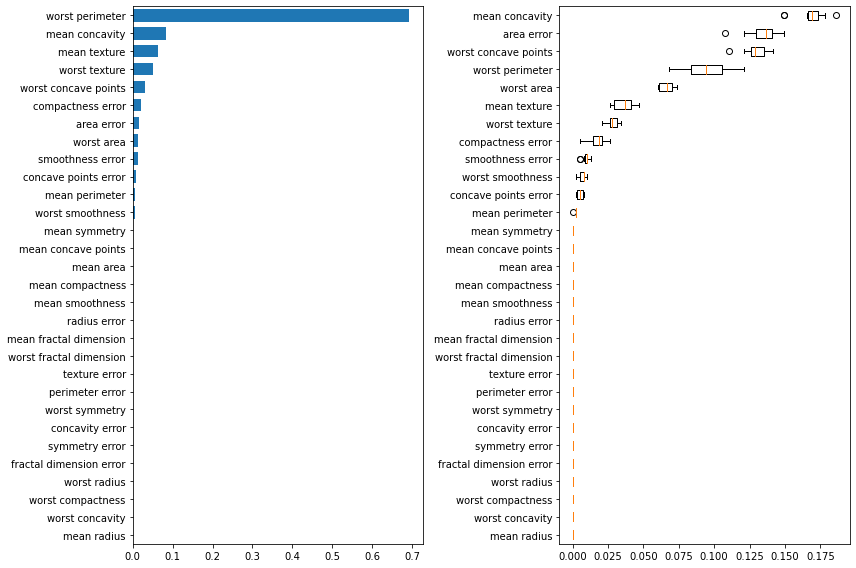

In [266]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(lbc.feature_names[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T,vert=False,labels=lbc.feature_names[perm_sorted_idx])
fig.tight_layout()
plt.show()

#### **So, here it has become very clear that none of the features are really important the model because the maximum drop in the accuracy we have witnessed is only 0.175.**

https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [4]:
from sklearn.inspection import partial_dependence, plot_partial_dependence